In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

You can initialize the environment / game as following:

In [5]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [6]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [7]:
env.render()

|- - -|
|- - -|
|- - -|



### Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [8]:
env.step(2)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 False,
 None)

In [9]:
env.render()

|- - X|
|- - -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [11]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [12]:
env.render()

|- - X|
|- O -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [11]:
#env.step((0,2))

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [13]:
env.reward(player='X')

0

In [14]:
env.reward(player='O')

0

An example of finishing the game:

In [15]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [16]:
env.render()

|X X X|
|O O -|
|- - -|



In [17]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [18]:
env.reward(player='X')

1

In [19]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset();

In [21]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [22]:
opt_player.act(env.grid)

(1, 1)

In [23]:
opt_player.player

'X'

### An example of optimal player playing against random player

In [24]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)] #randomly assigning who plays first
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X O X|
|- O X|
|- O -|

-------------------------------------------
Game end, winner is player None
Optimal player = O
Random player = X
|O X O|
|X O X|
|X O X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|- - O|
|X O X|
|O - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O O X|
|- X X|
|O - X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - O|
|X O -|
|O - X|



### An example of optimal player playing against optimal player

In [25]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|X O O|
|O X X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|X O O|
|O X X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|



## Implementation of Qlearning

In [3]:
from collections import defaultdict
from random import randint
from random import random

def act(q_values, grid, epsilon):
    return act_random(grid) if random()<epsilon else act_optimal(q_values, grid)

def act_random(grid):
    actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
    move = actions[randint(0,len(actions)-1)]
    return move



def act_optimal(q_values, grid):
    actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
    actions_values = list([q_value(q_values, grid, a) for a in actions])
        
    move = actions[agrmax(actions_values)]
    return move

def q_value(q_values, grid, action):
    return q_values[(grid_repr(grid), action)]
    
    
def valid_move(grid, move):
    return grid[move] == 0

def agrmax(array):
    return np.argmax(np.array(array))

def grid_repr(grid):
    between_0_2 = grid.reshape((9))+1
    power_of_3 = 3**np.arange(9)
    return (between_0_2*power_of_3).sum()

def update_qvalue_end(q_values, state, action, next_state, reward, alpha=0.05, gamma=0.99):
    if state is not None and action is not None:
        estimated_q = q_value(q_values, state, action)
        next_state_value = 0 if next_state is None else q_value(q_values, next_state, act_optimal(q_values,next_state))
        delta_q = reward + gamma*next_state_value  - estimated_q
        q_values[(grid_repr(state), action)] = estimated_q+alpha*delta_q

### Checking if the algorithm works 

In [50]:
Turns = np.array(['X','O'])
q_values = defaultdict(lambda : 0)

for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    
    last_state = None
    last_action = None
    
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = act(q_values, grid, 0.1)
            
            update_qvalue_end(q_values, last_state, last_action, grid, 0)
                
            last_state = grid
            last_action = move

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Q player = ' +  Turns[1])
            update_qvalue_end(q_values, last_state, last_action, None, env.reward(player=Turns[1]))
        
    
            env.reset()
            break

-------------------------------------------
Game end, winner is player X
Optimal player 1 = X
Q player = O
-------------------------------------------
Game end, winner is player O
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player X
Optimal player 1 = X
Q player = O
-------------------------------------------
Game end, winner is player X
Optimal player 1 = X
Q player = O
-------------------------------------------
Game end, winner is player X
Optimal player 1 = X
Q player = O


___

## Part 2.1

### Question 1. 

Plot average reward for every 250 games during training – i.e. after the 50th game, plot the average reward of the first 250 games, after the 100th game, plot the average reward of games 51 to 100, etc. Does the agent learn to play Tic Tac Toe?

In [52]:
env = TictactoeEnv()
Turns = np.array(['X','O'])
q_player = defaultdict(lambda : 0)
avg_rewards = np.empty(80, float)
s = 0
k = 0

for i in range(20000):
    grid, _, __ = env.observe()
    player_opt = OptimalPlayer(epsilon=0.5, player=Turns[np.mod(i,2)]) #switching first player per game
    
    last_state = None
    last_action = None
    
    
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = act(q_values, grid, 0.1)
            
            update_qvalue_end(q_values, last_state, last_action, grid, 0)
                
            last_state = grid
            last_action = move

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            if np.mod(i,1000) == 0:
                print('-------------------------------------------')
                print('Game: ' + str(i))
                print('Optimal player = ' +  Turns[np.mod(i,2)])
                print('Q player = ' +  Turns[np.mod(i+1,2)])
                print('Game ended, winner is player ' + str(winner))
            
            
            q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])
            
            # Storing q_player_reward
            s += q_player_reward 
            if np.mod(i+1, 250) == 0:
                avg_rewards[k] = s / 250.0
                s = 0
                k += 1
            update_qvalue_end(q_values, last_state, last_action, None, q_player_reward)
            
    
            env.reset()
            break

-------------------------------------------
Game: 0
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 1000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 2000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 3000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 4000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 5000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 6000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 7000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 800

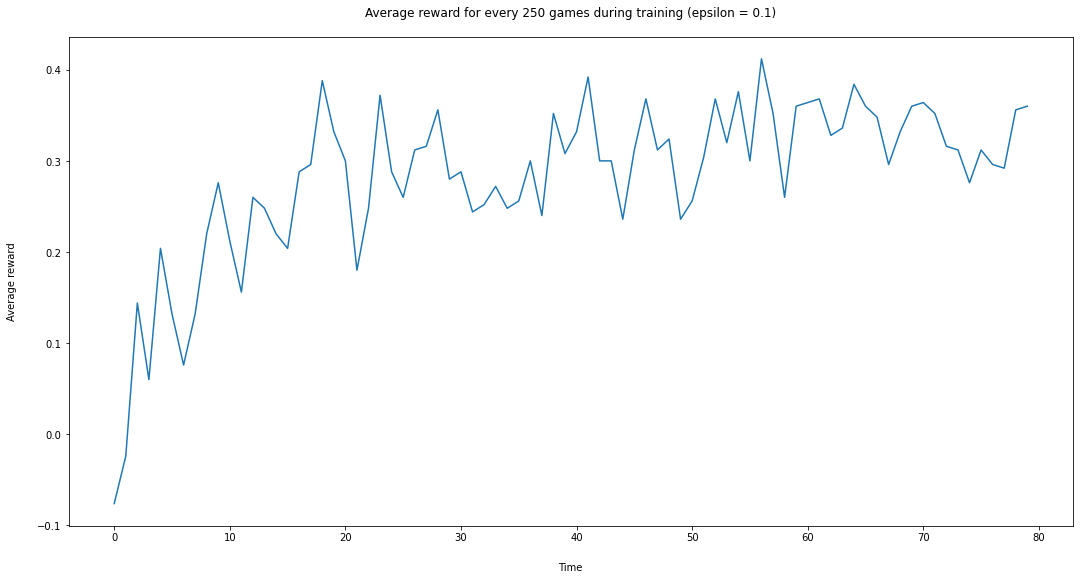

In [53]:
fig = plt.figure(figsize=(18,9))
ax = sns.lineplot(x=range(0, len(avg_rewards)), y = avg_rewards)
ax.set_title('Average reward for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average reward', labelpad = 20)
plt.xlabel('Time', labelpad = 20)
plt.show()

### Question 2. 

Plot average reward for every 250 games during training. Does decreasing help training compared to having a fixed ? What is the effect of n*?
Expected answer: A figure showing average reward over time for different values of n*

In [4]:
def epsilon(n, n_star, epsilon_min = 0.1, epsilon_max = 0.8):
    return np.maximum(epsilon_min, epsilon_max*(1-n/n_star))

In [7]:
def compute_M(q_values, epsilon, n_games = 500):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    
   
    win_minus_loss = 0
    
    player_opt = OptimalPlayer(epsilon=epsilon, player=Turns[1])
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        
        #QPlayer plays first for the first 250 games and we switch to the optimal player after n_games/2 games
        if i == n_games//2 :
            player_opt.player = Turns[0]
        
        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = act_optimal(q_values, grid)

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                win_minus_loss += env.reward(player=Turns[0 if n_games//2>i else 1])
                env.reset()
                break
    
   
    return (win_minus_loss)/n_games
        

In [6]:
def epsilon(n, n_star, epsilon_min = 0.1, epsilon_max = 0.8):
    return np.maximum(epsilon_min, epsilon_max*(1-n/n_star))

def play_epsilon_n_strategy(n_star, n_games = 20000, player_opt_epsilon = 0.5, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_values = defaultdict(lambda : 0)
    
    array_length = int(n_games/average_length)
    
    avg_rewards = np.empty(array_length, float) #list that stores the avg reward for each 'average_length' games
    
    M_opts = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    M_rands = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    
    s = 0 # variable which summs the average reward every 250 games  
    k = 0 # array_index
    
    player_opt = OptimalPlayer(epsilon=player_opt_epsilon, player=Turns[0])
    
    for i in tqdm(range(n_games)):
        grid, _, __ = env.observe()
        player_opt.player = Turns[np.mod(i,2)] #switching first player per game
        
        last_state = None
        last_action = None
        

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = act(q_values, grid, epsilon(i, n_star))
                
                update_qvalue_end(q_values, last_state, last_action, grid, 0)
                
                last_state = grid
                last_action = move

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                    
                q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])

                # Storing q_player_reward
                s += q_player_reward 
                if np.mod(i+1, average_length) == 0:
                    avg_rewards[k] = s / 250.0
                    s = 0
                                    
                    #Computing M_Opt
                    M_opts[k] = compute_M(q_values, 0.0)
                    
                    #Computing M_rand
                    M_rands[k] = compute_M(q_values, 1.0)
                    
                    k += 1
                    
                update_qvalue_end(q_values, last_state, last_action, None, q_player_reward)


                env.reset()
                break
                
    return avg_rewards, M_opts, M_randscom

In [5]:
n_stars = np.array([1, 50, 200, 750, 4000, 8000, 16000, 32000, 40000])
result = np.array([play_epsilon_n_strategy(n_star) for n_star in n_stars])

100%|█████████████████████████████████████| 20000/20000 [07:11<00:00, 46.32it/s]


In [34]:
avg_rewards = result[:,0,:]
M_opts = result[:, 1, :]
M_rands = result[:, 2, :]

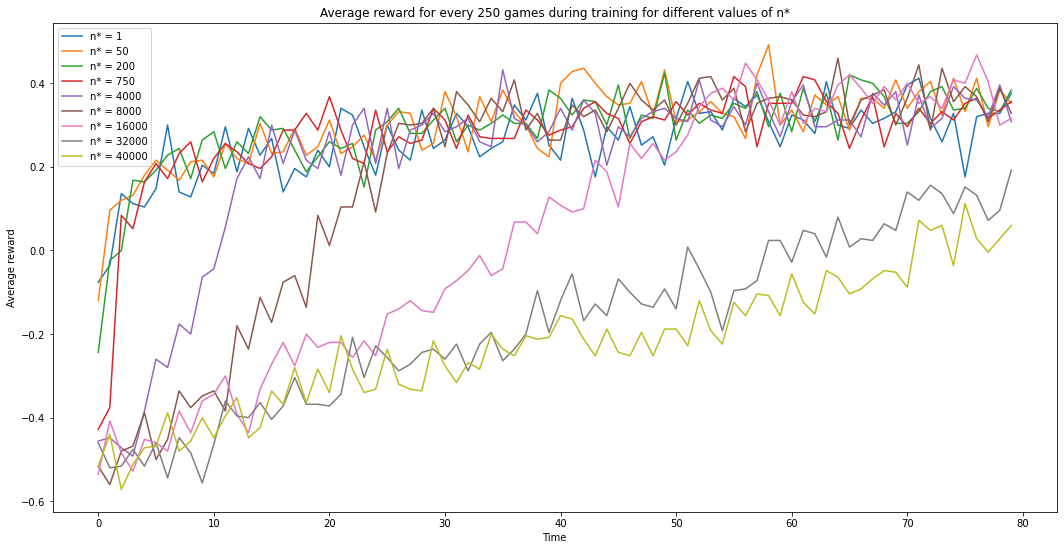

In [8]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = avg_rewards[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('Average reward for every 250 games during training for different values of n*')
plt.ylabel('Average reward')
plt.xlabel('Time')
plt.show()


### Question 3

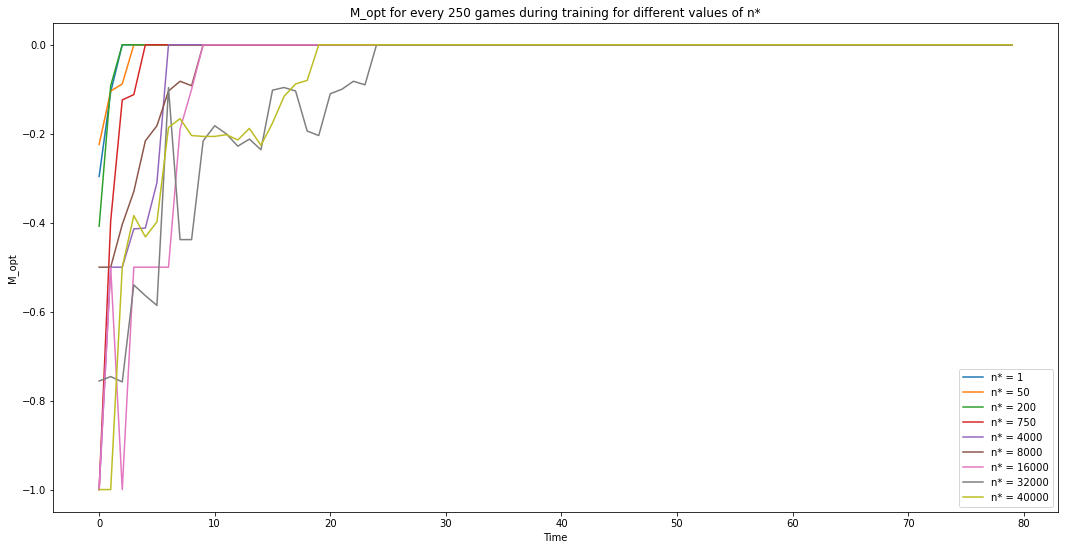

In [9]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n*')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

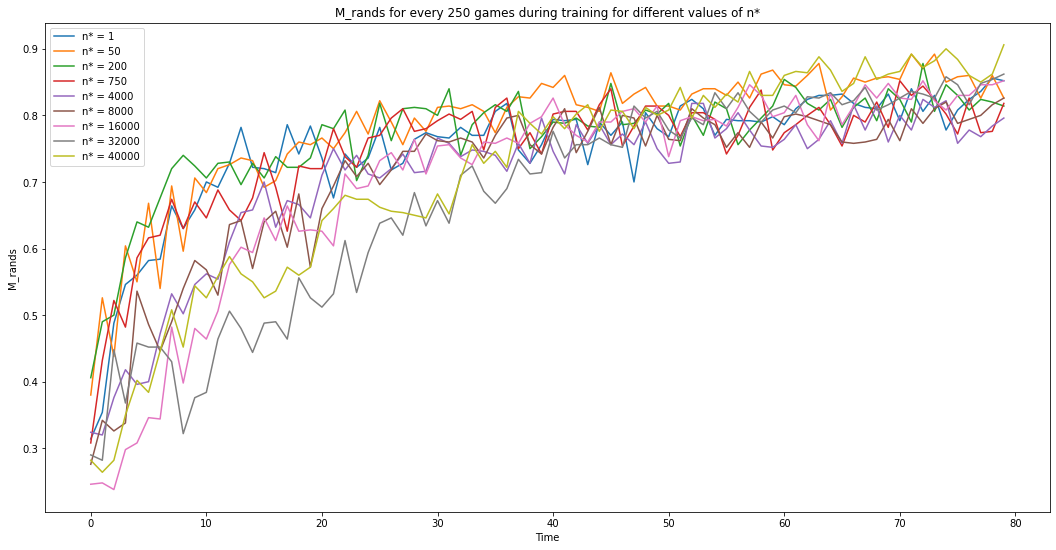

In [10]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

In [14]:
for i, x in enumerate(M_opts):
    print(f'n_star: {n_stars[i]} M_opt: {x[-1]}')

n_star: 1 M_opt: 0.0
n_star: 50 M_opt: 0.0
n_star: 200 M_opt: 0.0
n_star: 750 M_opt: 0.0
n_star: 4000 M_opt: 0.0
n_star: 8000 M_opt: 0.0
n_star: 16000 M_opt: 0.0
n_star: 32000 M_opt: 0.0
n_star: 40000 M_opt: 0.0


In [15]:
for i, x in enumerate(M_rands):
    print(f'n_star: {n_stars[i]} M_opt: {x[-1]}')

n_star: 1 M_opt: 0.852
n_star: 50 M_opt: 0.826
n_star: 200 M_opt: 0.814
n_star: 750 M_opt: 0.818
n_star: 4000 M_opt: 0.796
n_star: 8000 M_opt: 0.826
n_star: 16000 M_opt: 0.852
n_star: 32000 M_opt: 0.862
n_star: 40000 M_opt: 0.906


Best n_star = 40000, maybe noise but a trend 

In [7]:
def training_time_m_opt(values):
    values = np.array(values)+1
    last = values[-1]
    
    return np.argmax(values>=last*0.8)+1

def training_time_m_rands(values):
    values = np.array(values)
    last = values[-1]
    
    return np.argmax(values>=last*0.8)+1

In [32]:
training_time_opt = training_time_m_opt(M_opts[-1])
training_time_rand = training_time_m_opt(M_rands[-1])

print(f'training_time_m_opt {training_time_opt*250}  training_time_m_rand {training_time_rand*250}')

training_time_m_opt 1750  training_time_m_rand 2500


### Question 4 & 5

In [6]:
n_star = 40000
e_opts = np.array([0.0, 0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 1.0])
result = np.array([play_epsilon_n_strategy(n_star, player_opt_epsilon = e_opt) for e_opt in e_opts])
M_opts = result[:, 1, :]
M_rands = result[:, 2, :]

100%|████████████████████████████████████| 20000/20000 [03:17<00:00, 101.48it/s]


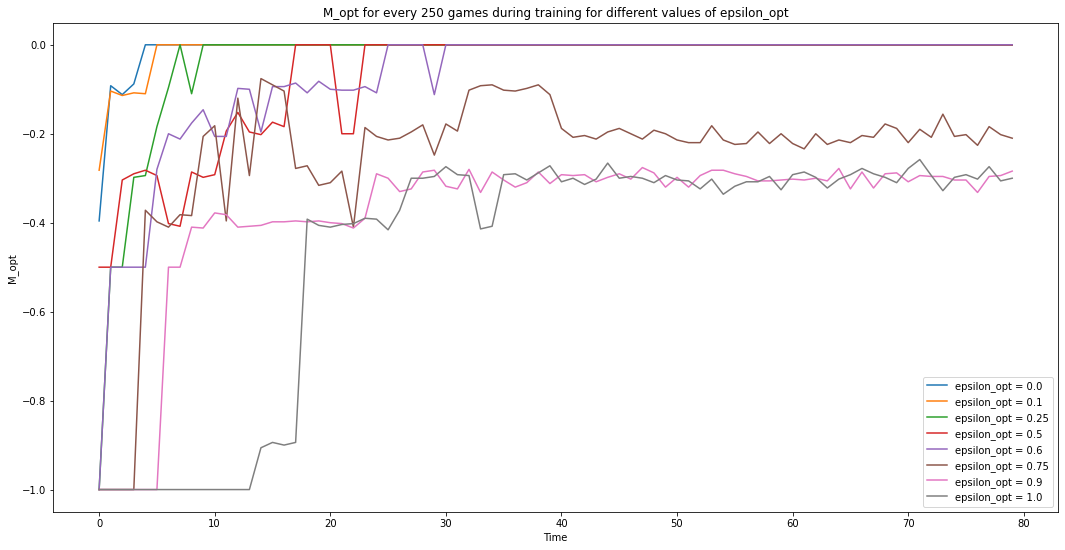

In [17]:
fig = plt.figure(figsize=(18,9))
for i in range(len(e_opts)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'epsilon_opt = ' + str(e_opts[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon_opt')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

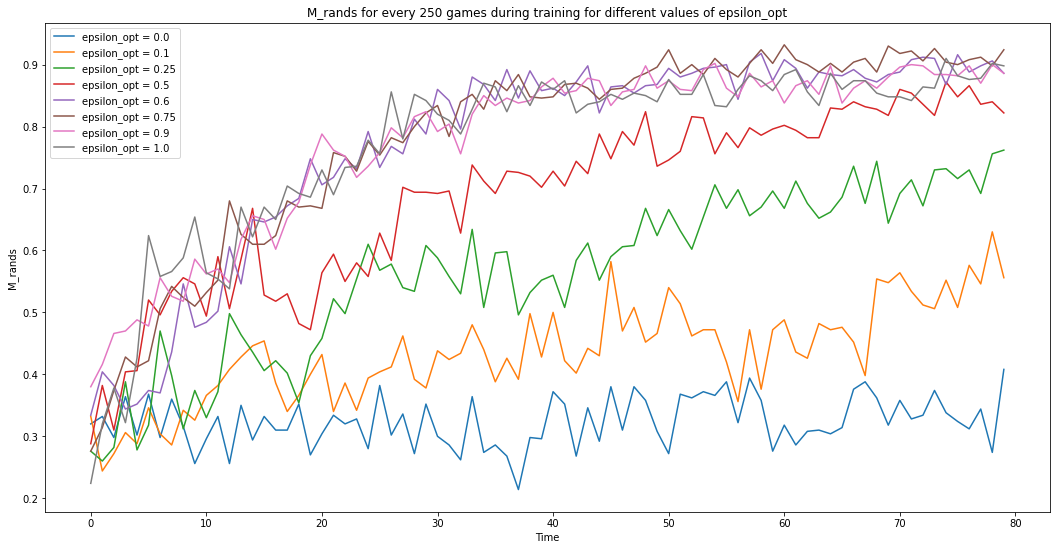

In [18]:
fig = plt.figure(figsize=(18,9))
for i in range(len(e_opts)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'epsilon_opt = ' + str(e_opts[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of epsilon_opt')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

In [11]:
for i, x in enumerate(M_opts):
    print(f'e_opts: {e_opts[i]} M_opt: {x[-1]}')

e_opts: 0.0 M_opt: 0.0
e_opts: 0.1 M_opt: 0.0
e_opts: 0.25 M_opt: 0.0
e_opts: 0.5 M_opt: 0.0
e_opts: 0.6 M_opt: 0.0
e_opts: 0.75 M_opt: -0.21
e_opts: 0.9 M_opt: -0.284
e_opts: 1.0 M_opt: -0.3


In [12]:
for i, x in enumerate(M_rands):
    print(f'e_opts: {e_opts[i]} M_opt: {x[-1]}')

e_opts: 0.0 M_opt: 0.408
e_opts: 0.1 M_opt: 0.556
e_opts: 0.25 M_opt: 0.762
e_opts: 0.5 M_opt: 0.822
e_opts: 0.6 M_opt: 0.886
e_opts: 0.75 M_opt: 0.924
e_opts: 0.9 M_opt: 0.886
e_opts: 1.0 M_opt: 0.898


In [13]:
training_time_opt = training_time_m_opt(M_opts[4])
training_time_rand = training_time_m_opt(M_rands[5])

print(f'training_time_m_opt {training_time_opt*250}  training_time_m_rand {training_time_rand*250}')

training_time_m_opt 1750  training_time_m_rand 2000


## Part 2.2

### Question 7

In [29]:
def play_against_self_strategy(epsilon, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    
    q_values = defaultdict(lambda : 0)
    
    array_length = int(n_games/average_length)
    
    M_opts = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    M_rands = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    
    k = 0
    
    for i in tqdm(range(n_games)):
        grid, _, __ = env.observe()
        last_state_1 = None
        last_action_1 = None
        
        last_state_2 = None
        last_action_2 = None
    
        q_player_two_turn = Turns[np.mod(i,2)] #Switching who starts at each iteration between q_player_one and q_player_two
    
        for j in range(9):
            
            move = act(q_values, grid, epsilon)
            if env.current_player == 'X':
                update_qvalue_end(q_values, last_state_1, last_action_1, grid, 0)
                last_state_1 = grid
                last_action_1 = move
            else:
                update_qvalue_end(q_values, last_state_2, last_action_2, grid, 0)
                last_state_2 = grid
                last_action_2 = move
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                if np.mod(i+1, average_length) == 0:
                  
                    #Computing M_Opq_player_one.epsilont
                    M_opts[k] = compute_M(q_values, 0.0)
                  
                    
                    #Computing M_rand
                    M_rands[k] = compute_M(q_values, 1.0)
                    
                    k += 1
                
                update_qvalue_end(q_values, last_state_1, last_action_1, None, env.reward('X'))
                update_qvalue_end(q_values, last_state_2, last_action_2, None, env.reward('O'))
        

                env.reset()
                break
                
    return M_opts, M_rands

In [6]:
epsilons = np.array([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
result = np.array([play_against_self_strategy(e) for e in epsilons])

100%|█████████████████████████████████████| 20000/20000 [05:20<00:00, 62.39it/s]


In [47]:
M_opts = result[:, 0, :]
M_rands = result[:, 1, :]

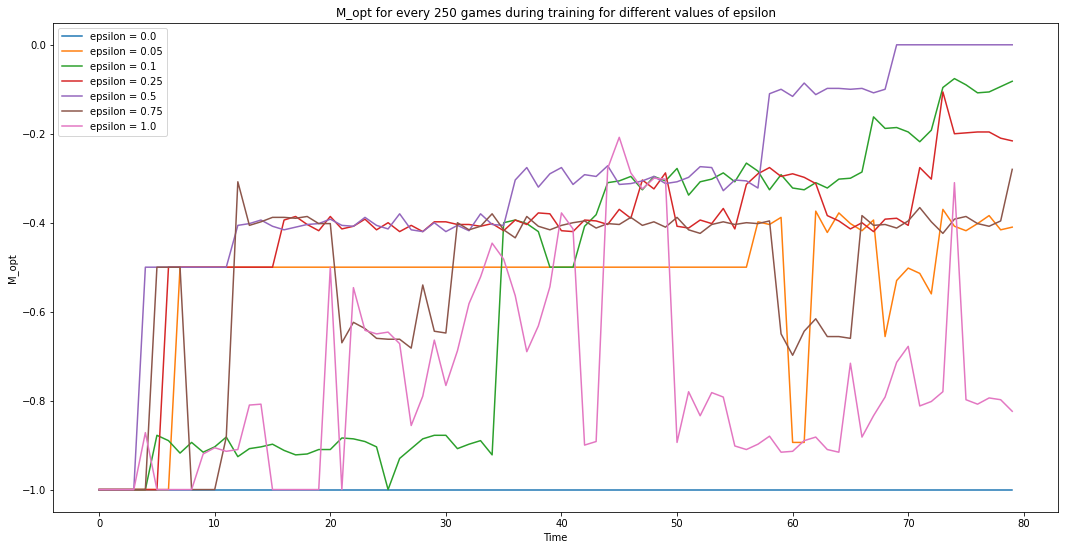

In [20]:
fig = plt.figure(figsize=(18,9))
for i in range(len(epsilons)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epsilons[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

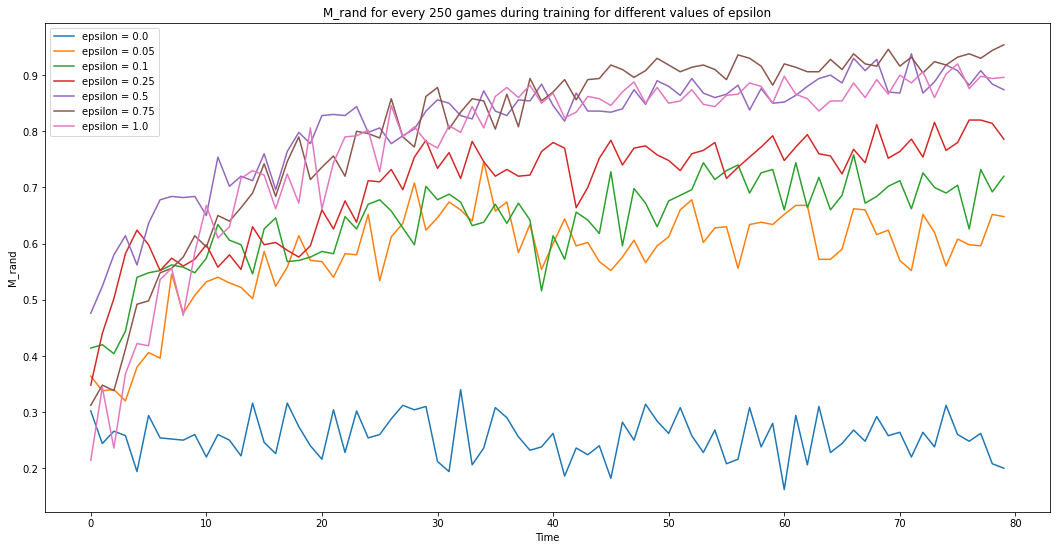

In [21]:
fig = plt.figure(figsize=(18,9))
for i in range(len(epsilons)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epsilons[i]))
plt.legend()
plt.title('M_rand for every 250 games during training for different values of epsilon')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

### Question 8 & 9

In [30]:
def play_against_self_epsilon_n_strategy(n_star, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    
    q_values = defaultdict(lambda : 0)
    array_length = int(n_games/average_length)
    
    M_opts = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    M_rands = np.empty(array_length, float) #list that stores the M_opt for each 'average length' games
    
    k = 0
    
    for i in tqdm(range(n_games)):
        grid, _, __ = env.observe()
        last_state_1 = None
        last_action_1 = None
        
        last_state_2 = None
        last_action_2 = None
    
        q_player_two_turn = Turns[np.mod(i,2)] #Switching who starts at each iteration between q_player_one and q_player_two
    
        for j in range(9):
            
            move = act(q_values, grid, epsilon(i,n_star))
            if env.current_player == 'X':
                update_qvalue_end(q_values, last_state_1, last_action_1, grid, 0)
                last_state_1 = grid
                last_action_1 = move
            else:
                update_qvalue_end(q_values, last_state_2, last_action_2, grid, 0)
                last_state_2 = grid
                last_action_2 = move
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                
                if np.mod(i+1, average_length) == 0:
                  
                    #Computing M_Opq_player_one.epsilont
                    M_opts[k] = compute_M(q_values, 0.0)
                  
                    
                    #Computing M_rand
                    M_rands[k] = compute_M(q_values, 1.0)
                    
                    k += 1
                
                update_qvalue_end(q_values, last_state_1, last_action_1, None, env.reward('X'))
                update_qvalue_end(q_values, last_state_2, last_action_2, None, env.reward('O'))
        

                env.reset()
                break
                
    return M_opts, M_rands

In [6]:
n_stars = np.array([1, 50, 200, 750, 4000, 8000, 16000, 32000, 40000])
result = np.array([play_against_self_epsilon_n_strategy(n_star) for n_star in n_stars])

100%|█████████████████████████████████████| 20000/20000 [03:44<00:00, 89.13it/s]


In [52]:
M_opts = result[:, 0, :]
M_rands = result[:, 1, :]

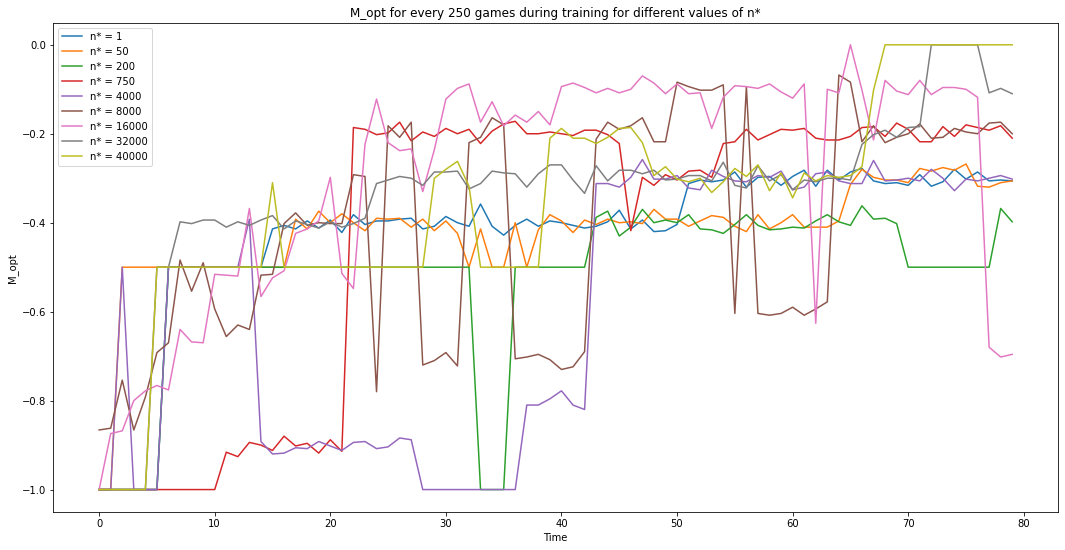

In [25]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n*')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

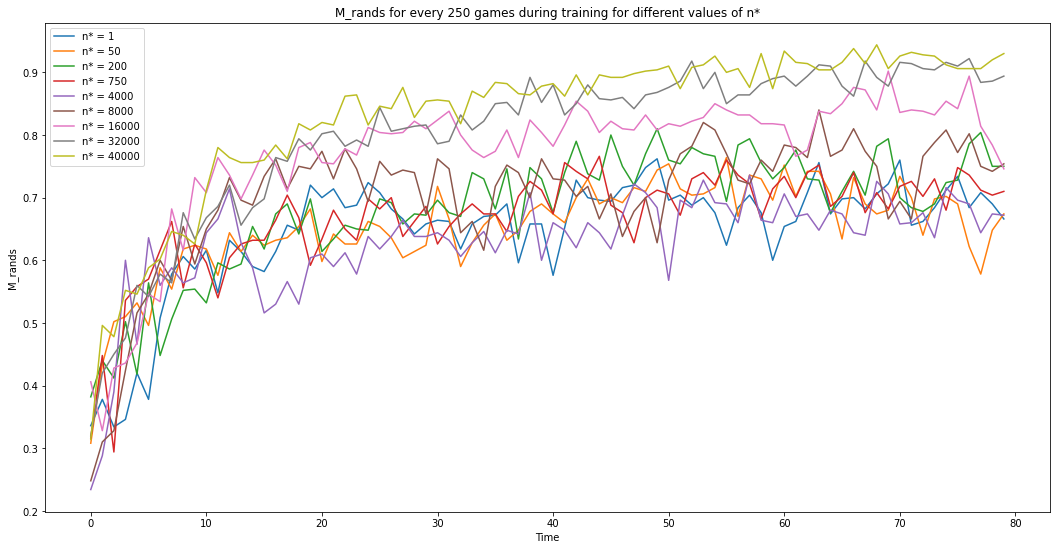

In [26]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

In [27]:
for i, x in enumerate(M_opts):
    print(f'n_star: {n_stars[i]} M_opt: {x[-1]}')

n_star: 1 M_opt: -0.306
n_star: 50 M_opt: -0.306
n_star: 200 M_opt: -0.398
n_star: 750 M_opt: -0.21
n_star: 4000 M_opt: -0.302
n_star: 8000 M_opt: -0.2
n_star: 16000 M_opt: -0.696
n_star: 32000 M_opt: -0.11
n_star: 40000 M_opt: 0.0


In [28]:
for i, x in enumerate(M_rands):
    print(f'n_star: {n_stars[i]} M_opt: {x[-1]}')

n_star: 1 M_opt: 0.666
n_star: 50 M_opt: 0.674
n_star: 200 M_opt: 0.75
n_star: 750 M_opt: 0.71
n_star: 4000 M_opt: 0.672
n_star: 8000 M_opt: 0.754
n_star: 16000 M_opt: 0.746
n_star: 32000 M_opt: 0.894
n_star: 40000 M_opt: 0.93


Best n_star = 40000

In [30]:
training_time_opt = training_time_m_opt(M_opts[-1])
training_time_rand = training_time_m_opt(M_rands[-1])

print(f'training_time_m_opt {training_time_opt*250}  training_time_m_rand {training_time_rand*250}')

training_time_m_opt 10250  training_time_m_rand 1000


### Question 10

In [37]:
def train_against_self_epsilon_n_strategy(n_star, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
   
    
    q_values = defaultdict(lambda : 0)
   
    
    
    
    for i in tqdm(range(n_games)):
        
        
        #Switching who starts at each iteration between q_player_one and q_player_two
        play_a_game(q_values, epsilon(i,n_star))
    
       
       
                    
            
    return q_values

def play_a_game(q_values, epsilon):
    env = TictactoeEnv()
    last_state_1 = None
    last_action_1 = None
        
    last_state_2 = None
    last_action_2 = None
    
    grid, _, __ = env.observe()
    for j in range(9):
            
            move = act(q_values, grid, epsilon)
            if env.current_player == 'X':
                update_qvalue_end(q_values, last_state_1, last_action_1, grid, 0)
                last_state_1 = grid
                last_action_1 = move
            else:
                update_qvalue_end(q_values, last_state_2, last_action_2, grid, 0)
                last_state_2 = grid
                last_action_2 = move
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                update_qvalue_end(q_values, last_state_1, last_action_1, None, env.reward('X'))
                update_qvalue_end(q_values, last_state_2, last_action_2, None, env.reward('O'))
                
                return 

In [40]:
n_star =  40000
q_values = train_against_self_epsilon_n_strategy(n_star)

100%|████████████████████████████████████| 20000/20000 [00:32<00:00, 619.64it/s]


In [43]:
M_rand = compute_M(q_values,1)
M_opt = compute_M(q_values,0)
print(f'M_opt: {M_opt} M_rand: {M_rand}')

M_opt: -0.076 M_rand: 0.896


In [23]:
def tile_symbol(x):
    if x==1:
        return 'X'
    if x==-1:
        return 'O'
    return ''

def show_actions(q_values, grid):

    grid_representation = grid_repr(grid)
    labels = [[tile_symbol(grid[x,y]) for y in range(3)] for x in range(3)]
 
    actions = [[q_values[grid_representation, (x,y)] for y in range(3)] for x in range(3)]
    sns.heatmap(actions, annot=labels, fmt='', xticklabels=False, yticklabels=False)


|X X -|
|- - -|
|O - -|



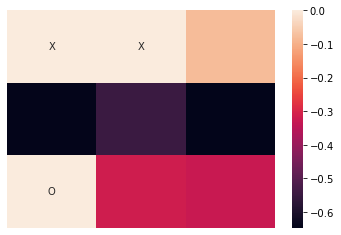

In [46]:
env = TictactoeEnv()
env.step((0,0))
env.step((2,0))
grid, _, _ = env.step((0,1))
env.render()

show_actions(q_values, grid)

|X O -|
|- - -|
|- - -|



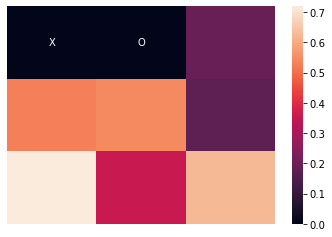

In [47]:
env = TictactoeEnv()
env.step((0,0))
grid, _, _ = env.step((0,1))
env.render()

show_actions(q_values, grid)

|- - -|
|- - -|
|- - -|



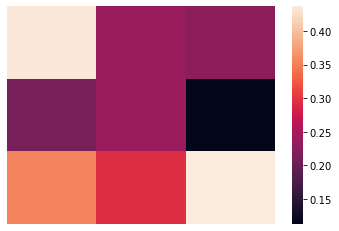

In [48]:
env = TictactoeEnv()
grid, _, _ = env.observe()
env.render()

show_actions(q_values, grid)

## Deep QLearning

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple, deque 
from random import random, sample, randint

In [3]:
def valid_move(grid, move):
    return grid[(move//3,move%3)] == 0

def act(model, grid, player, epsilon):
    return act_random(grid) if random()<epsilon else act_optimal(model,grid, player)

def act_random(grid):
    actions = [i for i in range(9) if valid_move(grid,i)]
    return actions[randint(0,len(actions)-1)]

def act_optimal(model, grid, player):
     with torch.no_grad():
            actions_reward = model(grid_to_state(grid, player))
            return torch.argmax(actions_reward).item()

def grid_to_state(grid, player):
    return torch.tensor(np.stack([grid>0,grid<0] if player=='X' else [grid<0,grid>0])).float().view(1,-1)

        
def push(memory, last_state, last_move, grid, reward, player):
    if last_move is not None and last_state is not None:
        memory.push(grid_to_state(last_state, player), last_move, None if grid is None else grid_to_state(grid,player), reward)
    


def network():
    return nn.Sequential(nn.Linear(9*2,128),
                                  nn.ReLU(inplace=True),
                                  nn.Linear(128,128),
                                  nn.ReLU(inplace=True),
                                  nn.Linear(128,9))

#######from pytroch tutorial
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

class ReplayMemory:

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [4]:
def train_deep_q(epsilon=0.1, optimal_epsilon=0.5, buffer_size=10000, batch_size=64, nb_games = 20000, update_length = 500, average_length = 250.0):
    Turns = np.array(['X','O'])
    
    policy_net = network()
    target_net = network()
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()
    
    
    memory = ReplayMemory(buffer_size)
    
    optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)
    criterion = nn.HuberLoss()
    
    optimal = OptimalPlayer(epsilon=0.5, player=Turns[0])

    optimize_m = lambda  : optimize_model(policy_net, target_net, memory ,  optimizer, criterion, batch_size = batch_size, gamma=0.99)
    
    average_loss = []
    average_reward = []
 
    
    rewards = 0
    loss = 0
  
    for i in tqdm(range(nb_games)):
        optimal.player = Turns[np.mod(i,2)]
        
        (mean_loss, reward_) = train_on_a_game(optimal, policy_net, epsilon, Turns[np.mod(i+1,2)], optimize_m, memory)
        
        loss += mean_loss
        rewards += reward_
        
        
        if np.mod(i+1,update_length) == 0:
            target_net.load_state_dict(policy_net.state_dict())
        
        if np.mod(i+1,average_length) == 0:
            average_loss.append(loss/average_length)
            average_reward.append(rewards/average_length)
            loss = 0
            rewards = 0
           
    return average_loss, average_reward


def train_on_a_game(optimal, model, epsilon, model_turn, optimize_model, memory):
    env = TictactoeEnv()
    grid, _, __ = env.observe()
    
    sum_loss= 0
    nb_updates = 0
    
    last_move = None
    last_state = None
    
    for j in range(9):
            
            if env.current_player == model_turn:
                move =  act(model, grid, model_turn, epsilon)
               
                push(memory, last_state, last_move, grid, 0, model_turn)
                last_move = move
                last_state = grid
                    
            else:
                move = optimal.act(grid)
                move = move[0]*3+move[1]
                
          
            sum_loss += optimize_model()
            nb_updates += 1
            
            
            
            if not valid_move(grid,move):
                push(memory, last_state, last_move, None, -1, model_turn)
                return sum_loss/max(1,nb_updates), -1
            
                
            grid, end, winner = env.step(move, print_grid=False)
            
 
            
            if end:
                reward = env.reward(player=model_turn)
                push(memory, last_state, last_move, None, reward, model_turn)
                return sum_loss/max(1,nb_updates), reward

def optimize_model(policy_net, target_net, memory , optim, criterion, batch_size, gamma=0.99):
    ##### inspired from :: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    if len(memory)<batch_size:
        return 0
    
    transitions = memory.sample(batch_size)
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
  
   
    
    state_batch = torch.cat(batch.state)
    action_batch = torch.tensor(batch.action).unsqueeze(1)
    reward_batch = torch.tensor(batch.reward).unsqueeze(1)

 

    state_action_values = policy_net(state_batch).gather(1, action_batch)
    

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    with torch.no_grad():
        next_state_values = torch.zeros(batch_size)
        
        non_none_states = [s for s in batch.next_state if s is not None]
        if len(non_none_states)>0:
            non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), dtype=torch.bool) 
            non_final_next_states = torch.cat(non_none_states) 
            next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
            
        next_state_values = next_state_values.view((-1,1))
      
    
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * gamma) + reward_batch


    # Compute Huber loss

    loss = criterion(state_action_values, expected_state_action_values)
    
    # Optimize the model
    optim.zero_grad()
    loss.backward()
   
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optim.step()
   
   
    return loss.item()

In [49]:
average_loss, average_reward = train_deep_q(nb_games=20000)

100%|█████████████████████████████████████| 20000/20000 [15:18<00:00, 21.78it/s]


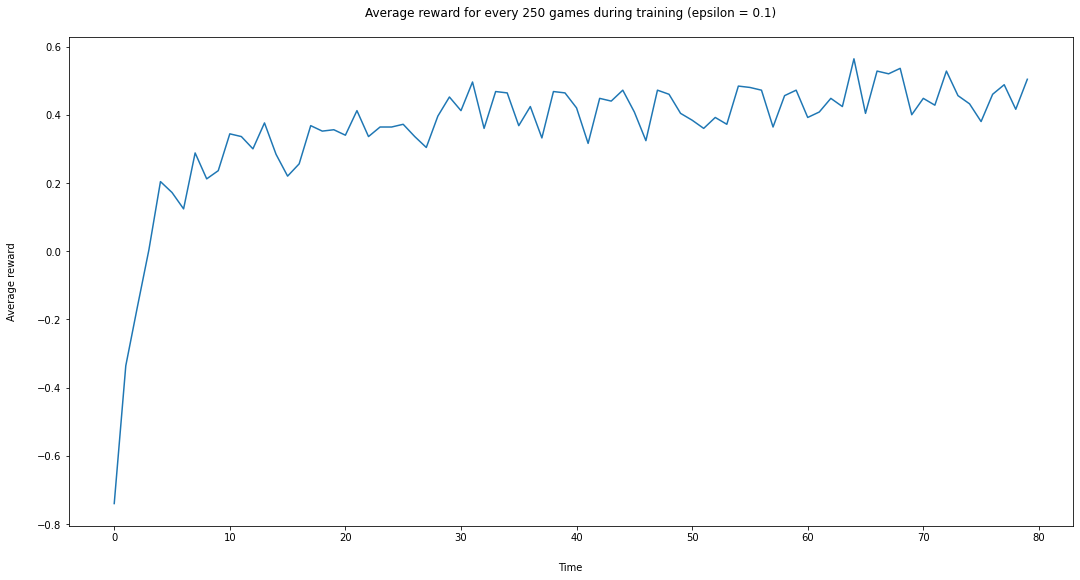

In [51]:
fig = plt.figure(figsize=(18,9))
ax = sns.lineplot(x=range(0, len(average_reward)), y = average_reward)
ax.set_title('Average reward for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average reward', labelpad = 20)
plt.xlabel('Time', labelpad = 20)
plt.show()

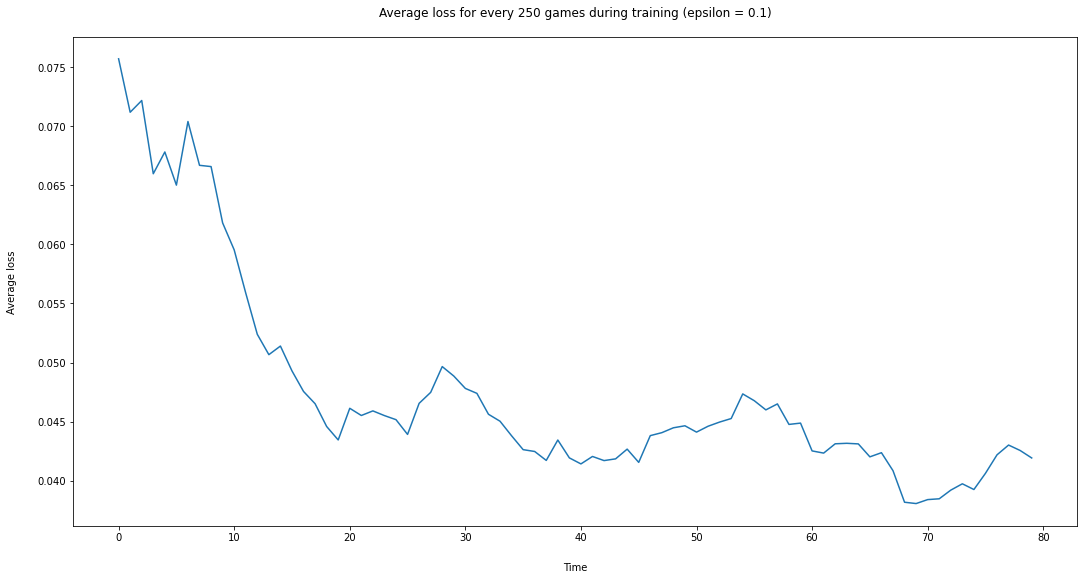

In [52]:
fig = plt.figure(figsize=(18,9))
ax = sns.lineplot(x=range(0, len(average_loss)), y = average_loss)
ax.set_title('Average loss for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average loss', labelpad = 20)
plt.xlabel('Time', labelpad = 20)
plt.show()

### Question 11

In [50]:
average_loss_without_buffer, average_reward_without_buffer = train_deep_q(nb_games=20000, buffer_size=1, batch_size=1)

100%|█████████████████████████████████████| 20000/20000 [04:23<00:00, 75.82it/s]


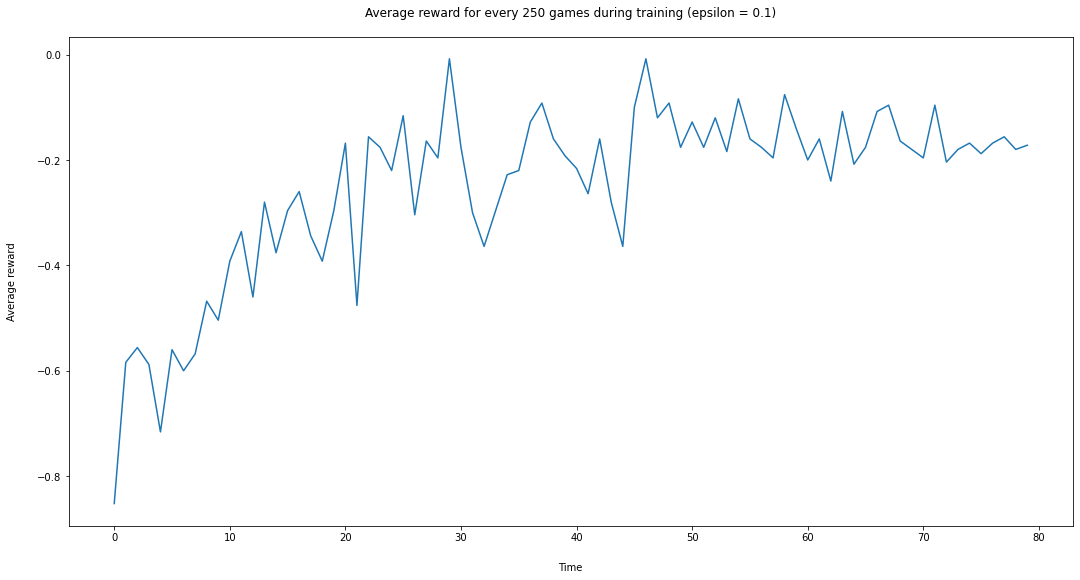

In [53]:
fig = plt.figure(figsize=(18,9))
ax = sns.lineplot(x=range(0, len(average_reward_without_buffer)), y = average_reward_without_buffer)
ax.set_title('Average reward for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average reward', labelpad = 20)
plt.xlabel('Time', labelpad = 20)
plt.show()

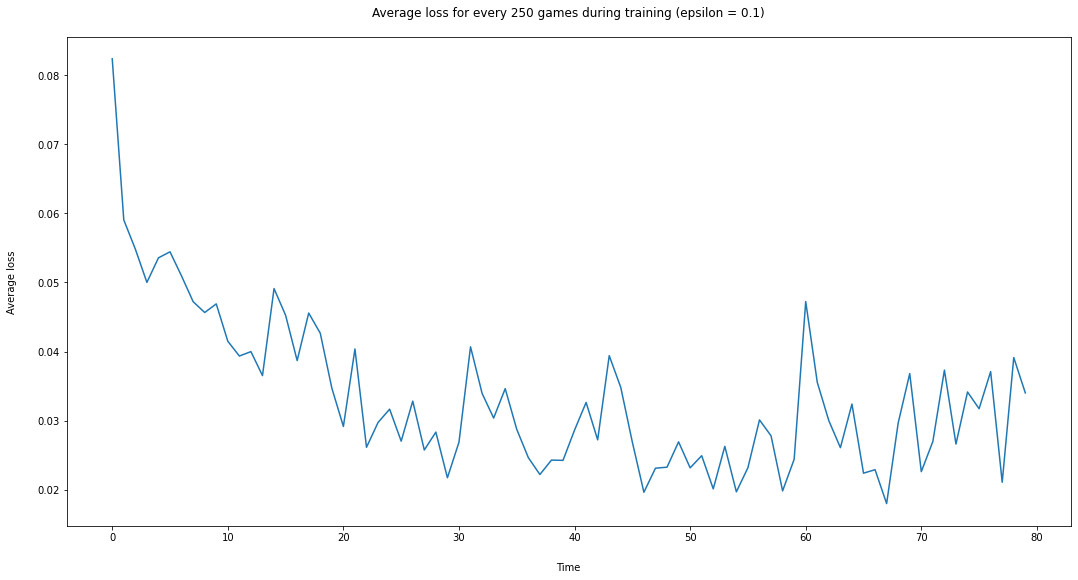

In [54]:
fig = plt.figure(figsize=(18,9))
ax = sns.lineplot(x=range(0, len(average_loss_without_buffer)), y = average_loss_without_buffer)
ax.set_title('Average loss for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average loss', labelpad = 20)
plt.xlabel('Time', labelpad = 20)
plt.show()

### Question 13

In [10]:
def compute_M(model, epsilon, n_games = 500):
    Turns = np.array(['X','O'])
    env = TictactoeEnv()


    deep_q_turn = Turns[0]
    win_minus_loss = 0
    
    player_opt = OptimalPlayer(epsilon=epsilon, player=Turns[1])
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        
        #QPlayer plays first for the first 250 games and we switch to the optimal player after n_games/2 games
        if i == n_games//2 :
            player_opt.player = Turns[0]
            deep_q_turn = Turns[1]
        
        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
                move = move[0]*3+move[1]
            else:
                with torch.no_grad():
                    move = act_optimal(model, grid, deep_q_turn)
            
           
            if not valid_move(grid,move):
                win_minus_loss -= 1
                env.reset()
                break

            grid, end, winner = env.step(move, print_grid=False)
        
           

            if end:
                win_minus_loss += env.reward(player=deep_q_turn)
                        
                env.reset()
                break
    
   
    return (win_minus_loss)/n_games



In [94]:
def epsilon(n, n_star, epsilon_min = 0.1, epsilon_max = 0.8):
    return np.maximum(epsilon_min, epsilon_max*(1-n/n_star))

def train_deep_q_epsilon_star(n_star=1, optimal_epsilon=0.5, buffer_size=10000, batch_size=64, nb_games = 20000, update_length = 500, average_length = 250.0):
    Turns = np.array(['X','O'])
    
    policy_net = network()
    target_net = network()
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()
    
    
    memory = ReplayMemory(buffer_size)
    
    optimizer = optim.Adam(policy_net.parameters(), lr=5e-4)
    criterion = nn.HuberLoss()
    
    optimal = OptimalPlayer(epsilon=0.5, player=Turns[0])

    optimize_m = lambda  : optimize_model(policy_net, target_net, memory ,  optimizer, criterion, batch_size = batch_size, gamma=0.99)
    
    M_opts =  []
    M_rands = [] 
  
    for i in tqdm(range(nb_games)):
        optimal.player = Turns[np.mod(i,2)]
        
        train_on_a_game(optimal, policy_net, epsilon(i, n_star), Turns[np.mod(i+1,2)], optimize_m, memory)
        
      
        
        
        if np.mod(i+1,update_length) == 0:
            target_net.load_state_dict(policy_net.state_dict())
        
        if np.mod(i+1,average_length) == 0:
            M_opts.append(compute_M(policy_net,0))
            M_rands.append(compute_M(policy_net,1))

           
           
    return M_opts, M_rands

In [32]:
n_stars = [1, 100, 750, 4000, 16000, 40000]
M_opts, M_rands =  {}, {}

for n_star in n_stars:
    M_opt, M_rand = train_deep_q_epsilon_star(n_star=n_star,  nb_games = 20000, average_length = 250)
    M_opts[n_star] = M_opt
    M_rands[n_star] = M_rand

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:21<00:00, 32.20it/s]


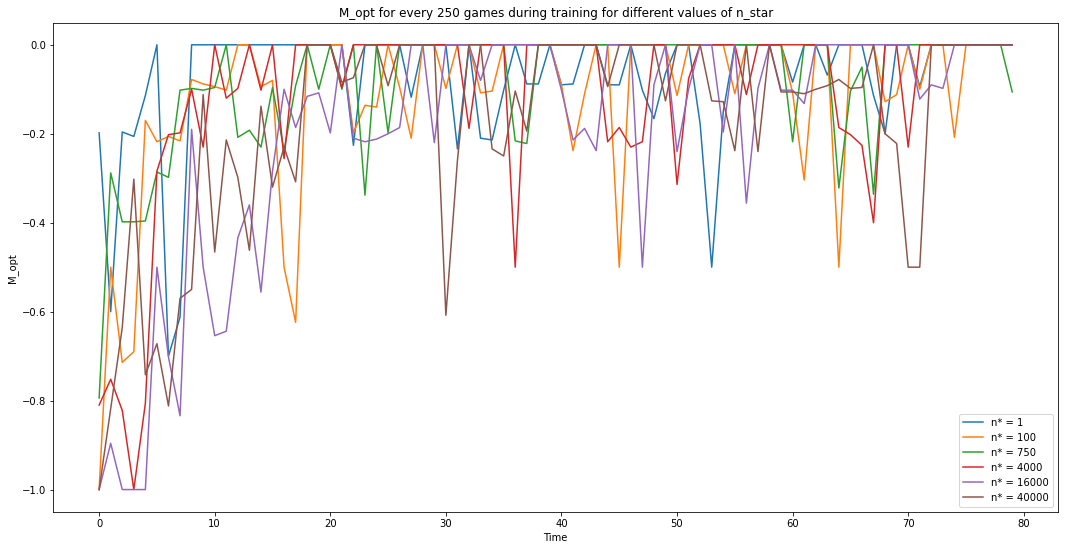

In [33]:
fig = plt.figure(figsize=(18,9))
for n_star, m_opt in M_opts.items():
    y = m_opt
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_star))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n_star')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

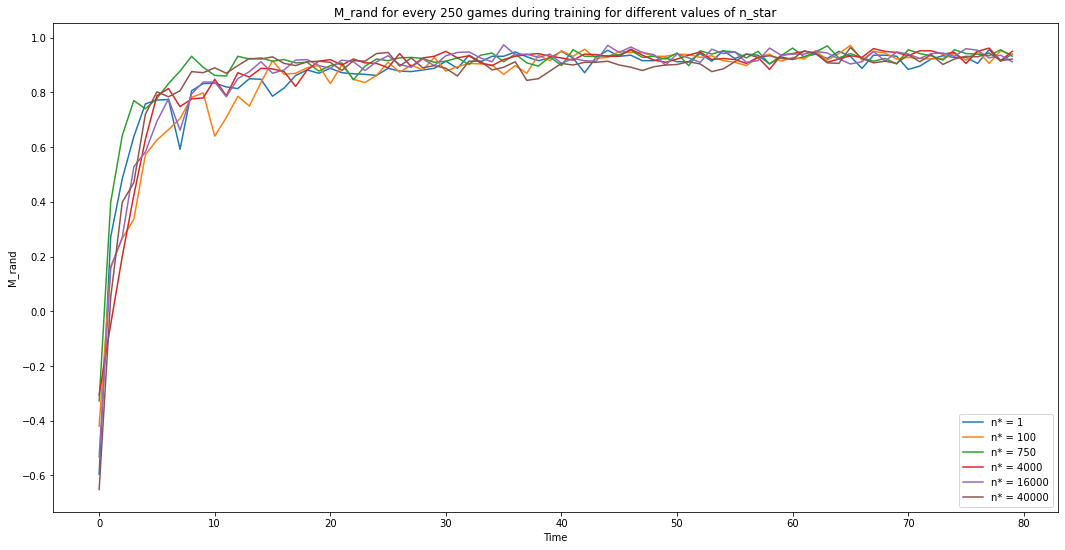

In [34]:
fig = plt.figure(figsize=(18,9))
for n_star, m_rand in M_rands.items():
    y = m_rand
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_star))
plt.legend()
plt.title('M_rand for every 250 games during training for different values of n_star')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

In [37]:
for n_star, m_opt in M_opts.items():
    print(f'n_star : {n_star} {m_opt[-1]}')

n_star : 1 0.0
n_star : 100 0.0
n_star : 750 -0.106
n_star : 4000 0.0
n_star : 16000 0.0
n_star : 40000 0.0


In [38]:
for n_star, m_rand in M_rands.items():
    print(f'n_star : {n_star} {m_rand[-1]}')

n_star : 1 0.94
n_star : 100 0.938
n_star : 750 0.932
n_star : 4000 0.95
n_star : 16000 0.912
n_star : 40000 0.922


### Question 14

In [21]:
e_opts = [0.0, 0.1, 0.3, 0.6, 0.8, 1.0]
M_opts, M_rands =  {}, {}
n_star = 1

for e_opt in e_opts:
    M_opt, M_rand = train_deep_q_epsilon_star(n_star=n_star, optimal_epsilon=e_opt, nb_games = 20000, average_length = 250)
    M_opts[e_opt] = M_opt
    M_rands[e_opt] = M_rand

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:36<00:00, 38.72it/s]


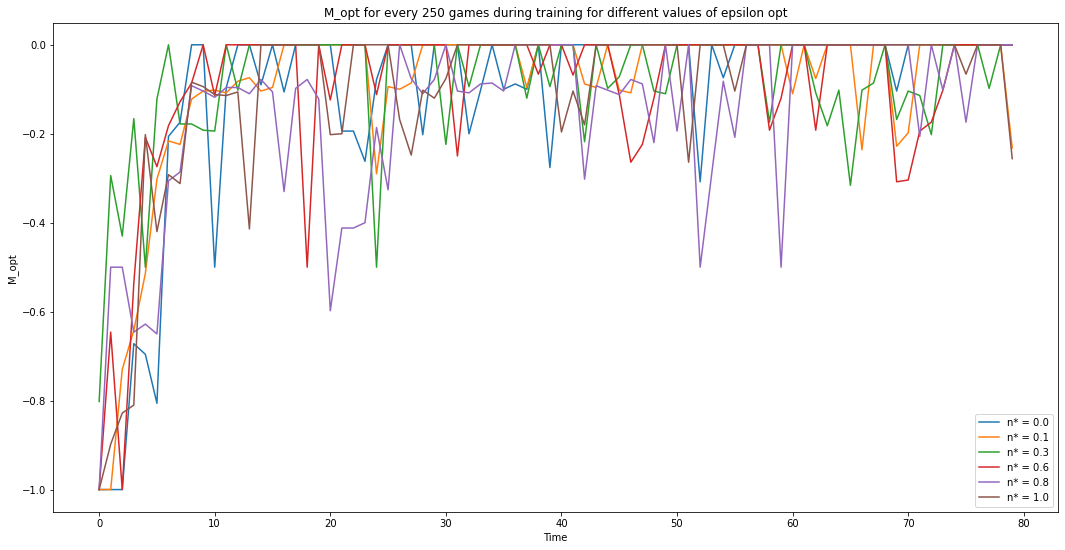

In [23]:
fig = plt.figure(figsize=(18,9))
for n_star, m_opt in M_opts.items():
    y = m_opt
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_star))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon opt')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

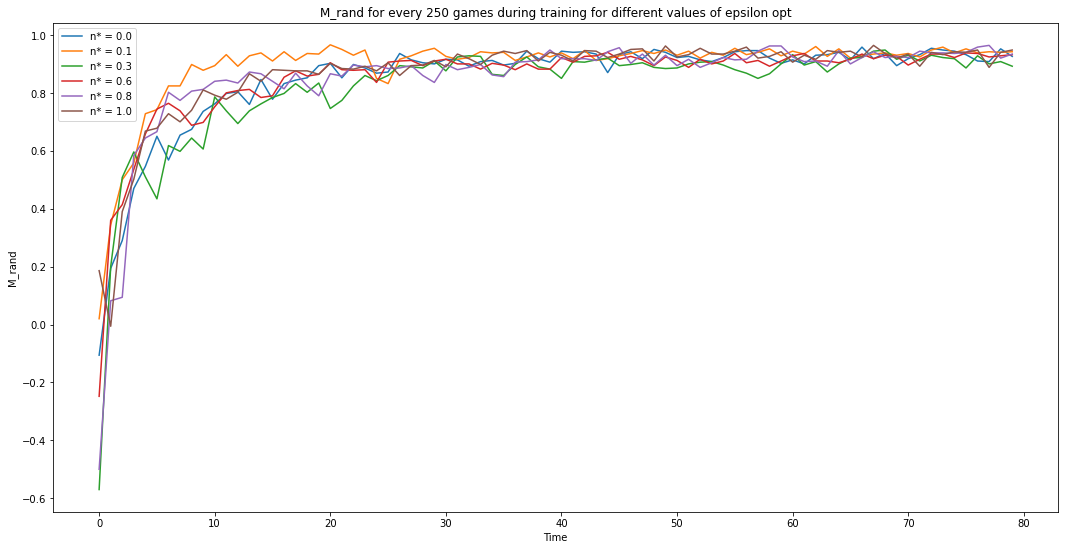

In [24]:
fig = plt.figure(figsize=(18,9))
for n_star, m_rand in M_rands.items():
    y = m_rand
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_star))
plt.legend()
plt.title('M_rand for every 250 games during training for different values of epsilon opt')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

In [25]:
for epsilon, m_opt in M_opts.items():
    print(f'epsilon opt : {epsilon} {m_opt[-1]}')

epsilon opt : 0.0 0.0
epsilon opt : 0.1 -0.232
epsilon opt : 0.3 0.0
epsilon opt : 0.6 0.0
epsilon opt : 0.8 0.0
epsilon opt : 1.0 -0.256


In [26]:
for epsilon, m_rand in M_rands.items():
    print(f'epsilon opt : {epsilon} {m_rand[-1]}')

epsilon opt : 0.0 0.926
epsilon opt : 0.1 0.942
epsilon opt : 0.3 0.892
epsilon opt : 0.6 0.932
epsilon opt : 0.8 0.934
epsilon opt : 1.0 0.948


In [32]:
best_epsilon_m_opt = 0.3
best_epsilon_m_rand = 1.0

training_time_opt = training_time_m_opt(M_opts[best_epsilon_m_opt])*250
training_time_rand = training_time_m_rands(M_rands[best_epsilon_m_rand])*250

print(f'training time m_opt {training_time_opt} training time m_rand {training_time_rand}')

training time m_opt 1000 training time m_rand 2500


### Questions 16-18

In [8]:
def train_deep_q_against_self(epsilon, buffer_size=10000, 
                              batch_size=64, nb_games = 20000, 
                              update_length = 500, 
                              average_length = 250.0):
    
    Turns = np.array(['X','O'])
    
    policy_net = network()
    target_net = network()
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()
    
   
    
    memory = ReplayMemory(buffer_size)
  
    
    optimizer = optim.Adam(policy_net.parameters(), lr=8e-5)
    criterion = nn.HuberLoss()
    
    optimize_m = lambda  : optimize_model(policy_net, target_net, memory,  
                                            optimizer, criterion, batch_size = batch_size, gamma=0.99)
    
    
    M_opts =  []
    M_rands = []
  
    for i in tqdm(range(nb_games)):
        
        
        
        train_on_a_game_against_self(policy_net, epsilon, optimize_m, memory)
        
        
        if np.mod(i+1,update_length) == 0:
            target_net.load_state_dict(policy_net.state_dict())
        
        if np.mod(i+1,average_length) == 0:
            M_opts.append(compute_M(policy_net,0))
            M_rands.append(compute_M(policy_net,1))
           
    return M_opts, M_rands


def train_on_a_game_against_self(model, epsilon,  optimize_model, memory):
    env = TictactoeEnv()
    grid, _, __ = env.observe()
    
    
    last_move_1 = None
    last_state_1 = None
    
    last_move_2 = None
    last_state_2 = None
    
    for j in range(9):
            
            move =  act(model, grid, env.current_player, epsilon)
            
            if env.current_player == 'X':
               
                push(memory, last_state_1, last_move_1, grid, 0, 'X')
                last_move_1 = move
                last_state_1 = grid
                
                    
            else:
              
                push(memory, last_state_2, last_move_2, grid, 0, 'O')
                last_move_2 = move
                last_state_2 = grid
            
            optimize_model()
                
              
            if not valid_move(grid,move) and env.current_player == 'X':
                    push(memory, last_state_1, last_move_1, None, -1, env.current_player)
                    return
                
            if not valid_move(grid,move) and env.current_player == 'O':
                    push(memory, last_state_2, last_move_2, None, -1, env.current_player)
                    return
                
            grid, end, winner = env.step(move, print_grid=False)
            
 
            
            if end:
                reward_1 = env.reward(player='X')
                reward_2 = env.reward(player='O')
                push(memory, last_state_1, last_move_1, None, reward_1, 'X')
                push(memory, last_state_2, last_move_2, None, reward_2, 'O')
                return

In [11]:
epislons = [0.05, 0.1, 0.3, 0.5, 0.75, 0.99]
M_opts, M_rands =  {}, {}

for epsilon in epislons:
    M_opt, M_rand = train_deep_q_against_self(epsilon=epsilon)
    M_opts[epsilon] = M_opt
    M_rands[epsilon] = M_rand

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [21:48<00:00, 15.29it/s]


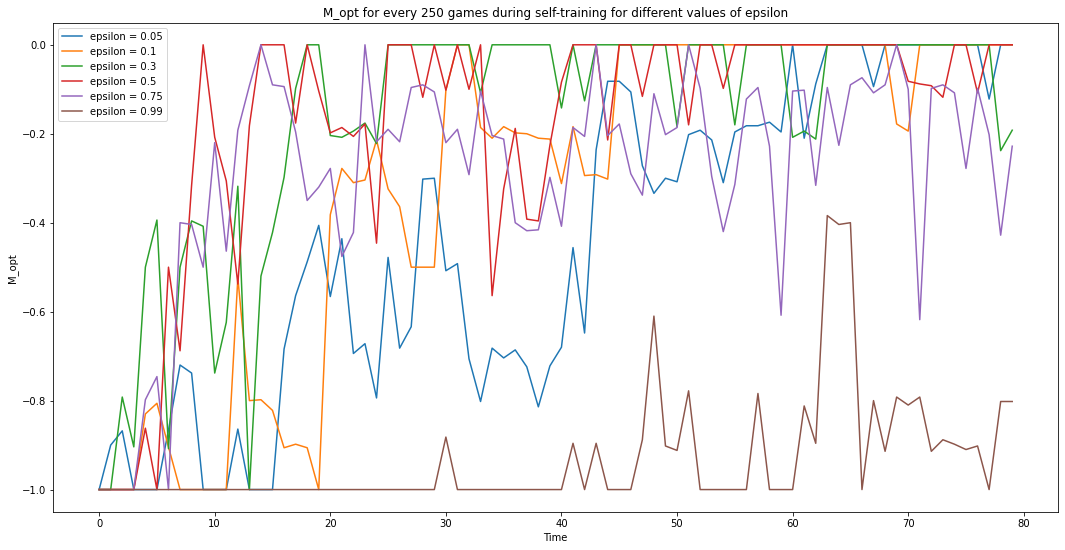

In [12]:
fig = plt.figure(figsize=(18,9))
for epislon, m_opt in M_opts.items():
    y = m_opt
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epislon))
plt.legend()
plt.title('M_opt for every 250 games during self-training for different values of epsilon')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

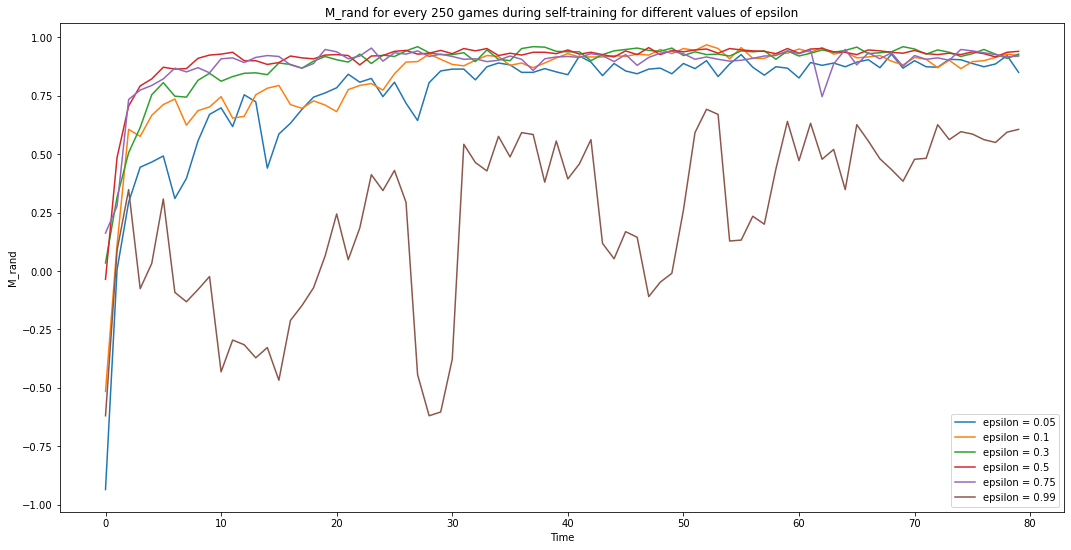

In [13]:
fig = plt.figure(figsize=(18,9))
for epislon, m_rand in M_rands.items():
    y = m_rand
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epislon))
plt.legend()
plt.title('M_rand for every 250 games during self-training for different values of epsilon')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

In [14]:
def epsilon(n, n_star, epsilon_min = 0.1, epsilon_max = 0.8):
    return np.maximum(epsilon_min, epsilon_max*(1-n/n_star))

def train_deep_q_against_self_epsilon_n_strategy(n_star, 
                                                 buffer_size=10000,
                                                 batch_size=64, nb_games = 20000, 
                                                 update_length = 500,
                                                 average_length = 250.0):
    
    Turns = np.array(['X','O'])
    
    policy_net = network()
    target_net = network()
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()
    
   
    
    memory = ReplayMemory(buffer_size)
  
    
    optimizer = optim.Adam(policy_net.parameters(), lr=8e-5)
    criterion = nn.HuberLoss()
    
    optimize_m = lambda  : optimize_model(policy_net, target_net, memory,  
                                            optimizer, criterion, batch_size = batch_size, gamma=0.99)
    
    
    M_opts =  []
    M_rands = []
  
    for i in tqdm(range(nb_games)):
        
        
        
        train_on_a_game_against_self(policy_net, epsilon(i, n_star), optimize_m, memory)
        
        
        if np.mod(i+1,update_length) == 0:
            target_net.load_state_dict(policy_net.state_dict())
        
        if np.mod(i+1,average_length) == 0:
            M_opts.append(compute_M(policy_net,0))
            M_rands.append(compute_M(policy_net,1))
           
    return M_opts, M_rands

In [16]:
n_stars = [1, 100, 750, 4000, 16000, 40000]
M_opts, M_rands =  {}, {}

for n_star in n_stars:
    M_opt, M_rand = train_deep_q_against_self_epsilon_n_strategy(n_star=n_star,  nb_games = 20000, average_length = 250)
    M_opts[n_star] = M_opt
    M_rands[n_star] = M_rand

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [13:05<00:00, 25.45it/s]


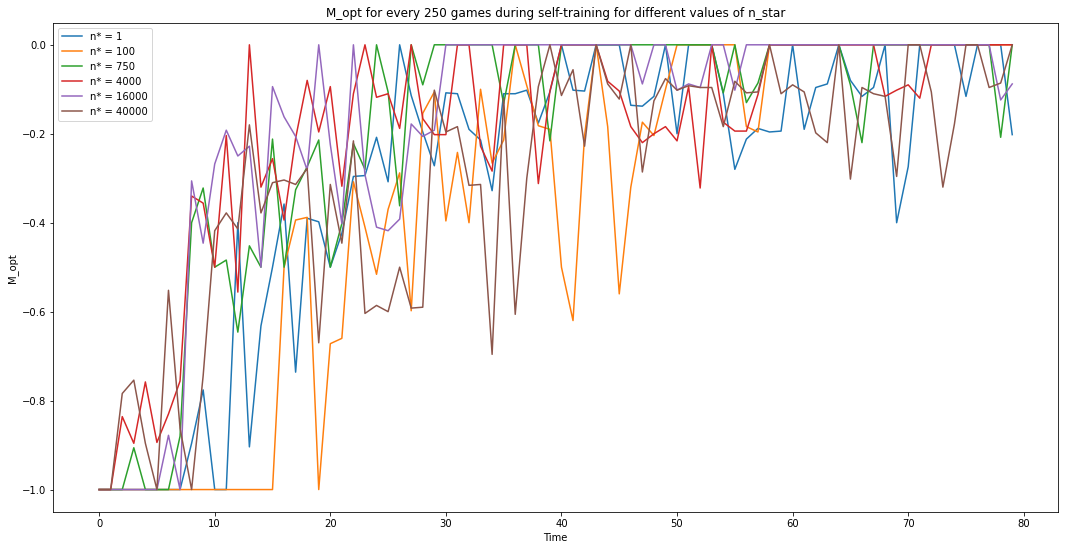

In [17]:
fig = plt.figure(figsize=(18,9))
for n_star, m_opt in M_opts.items():
    y = m_opt
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_star))
plt.legend()
plt.title('M_opt for every 250 games during self-training for different values of n_star')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

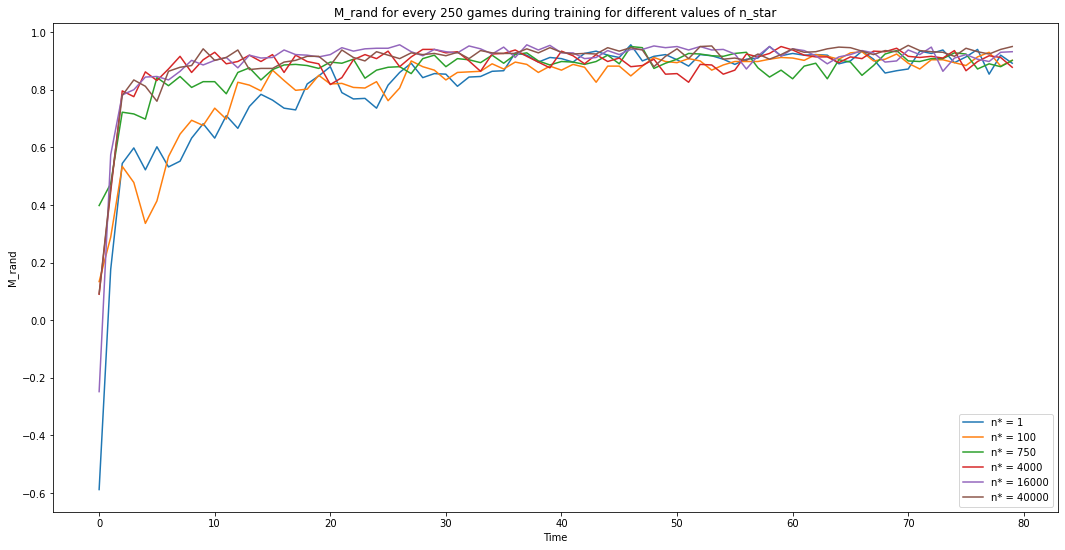

In [18]:
fig = plt.figure(figsize=(18,9))
for n_star, m_rand in M_rands.items():
    y = m_rand
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_star))
plt.legend()
plt.title('M_rand for every 250 games during training for different values of n_star')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

In [19]:
for n_star, m_opt in M_opts.items():
    print(f'n_star : {n_star} {m_opt[-1]}')

n_star : 1 -0.202
n_star : 100 0.0
n_star : 750 0.0
n_star : 4000 0.0
n_star : 16000 -0.088
n_star : 40000 0.0


In [21]:
for n_star, m_rand in M_rands.items():
    print(f'n_star : {n_star} {m_rand[-1]}')

n_star : 1 0.892
n_star : 100 0.902
n_star : 750 0.902
n_star : 4000 0.878
n_star : 16000 0.932
n_star : 40000 0.95


In [ ]:
def tile_symbol(x):
    if x==1:
        return 'X'
    if x==-1:
        return 'O'
    return ''

def show_actions(model, grid, player):

    grid_representation = grid_to_state(grid, player)
    labels = [[tile_symbol(grid[x,y]) for y in range(3)] for x in range(3)]
 
    #actions = [[model[grid_representation, (x,y)] for y in range(3)] for x in range(3)]
    actions = model(grid, )
    sns.heatmap(actions, annot=labels, fmt='', xticklabels=False, yticklabels=False)


In [28]:
model = train_deep_q_against_self_epsilon_n_strategy_q19(16000)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:44<00:00, 31.02it/s]


|X X -|
|- - -|
|O - -|



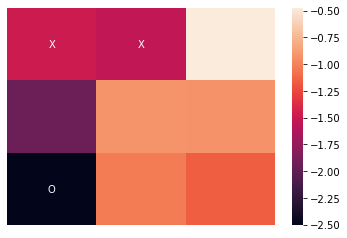

In [40]:
env = TictactoeEnv()
env.step((0,0))
env.step((2,0))
grid, _, _ = env.step((0,1))
env.render()


labels = [[tile_symbol(grid[x,y]) for y in range(3)] for x in range(3)]
with torch.no_grad():
    actions = model(grid_to_state(grid, 'O')).view((3,3))
sns.heatmap(actions, annot=labels, fmt='', xticklabels=False, yticklabels=False)
plt.show()

|X O -|
|- - -|
|- - -|



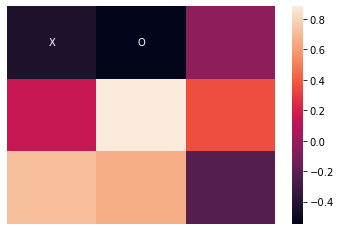

In [43]:
env = TictactoeEnv()
env.step((0,0))
grid, _, _ = env.step((0,1))
env.render()

labels = [[tile_symbol(grid[x,y]) for y in range(3)] for x in range(3)]
with torch.no_grad():
    actions = model(grid_to_state(grid, 'X')).view((3,3))
sns.heatmap(actions, annot=labels, fmt='', xticklabels=False, yticklabels=False)
plt.show()

|- - -|
|- - -|
|- - -|



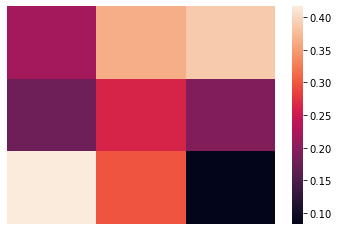

In [44]:
env = TictactoeEnv()
grid, _, _ = env.observe()
env.render()


labels = [[tile_symbol(grid[x,y]) for y in range(3)] for x in range(3)]
with torch.no_grad():
    actions = model(grid_to_state(grid, 'X')).view((3,3))
sns.heatmap(actions, annot=labels, fmt='', xticklabels=False, yticklabels=False)
plt.show()